# Curve Fitting



## Lagrange Polynomials

* Directly fit a polynomial to a given set of points.
* This can also then be used for interpolation if desired.
* Direct approach
    * Fit a degree $M-1$ polynomial through $M$ points. 
    * For example, for $M=4$, we have $p(x) = ax^3 + bx^2 + cx + d$. 
        * There are four coefficients, hence four degrees of freedom.
        * We specify these by stipulating that the polynomial pass through the four given $x$-$y$ points.
        * This gives four equations in four unknowns that we can solve for.


* Lagrange Polynomials.
    * The Lagrange form of the polynomial builds the $x$-$y$ points into the definition of the polynomial so that no explicit solve for the coefficients is needed.
    * Again, for $M=4$:
    
\begin{align*}
P(x)= & \frac{(1)(x-x_2)(x-x_3)(x-x_4)}{(1)(x_1-x_2)(x_1-x_3)(x_1-x_4)}y_1 + \\
     &   \frac{(x-x_1)(1)(x-x_3)(x-x_4)}{(x_2-x_1)(1)(x_2-x_3)(x_2-x_4)}y_2 + \\
     &   \frac{(x-x_1)(x-x_2)(1)(x-x_4)}{(x_3-x_1)(x_3-x_2)(1)(x_3-x_4)}y_3 + \\
     &   \frac{(x-x_1)(x-x_2)(x-x_3)(1)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)(1)}y_4.
\end{align*}

* Note the pattern. 
    * When $x=x_1$, the second, third, and fourth terms are all zero, and the first term becomes $\frac{1}{1}y_1=y_1$.
    * When $x=x_2$, the first, third, and fourth terms are all zero, and the seond term becomes $\frac{1}{1}y_2=y_2$.
    * Similarly for $x=x_3$ and $x=x_4$.
    
* The Lagrange Polynomials can be efficiently evaluated using Neville's Algorithm, or Divided Differences. See Hoffman, page 201, 204.

## Least Squares Approximation

* The goal of Least Squares Approximation is to fit a given function to a set of data.
* The function will have adjustable parameters, and we are finding the parameters that give the best fit, in some sense, to the data.
* The best fit can be defined in several ways, but the most popular is to form the sum square error between the function and the data points. The parameters are then modified to minimize the sum square error.


* Suppose 

$$f(x;a,b,c) = ax^2 + bx + c.$$

* We have a set of points $(x_i,\,y_i)$, given, and a set of modeled points $(x_i,\,f(x_i;a,b,c))$. Denote $f(x_i;a,b,c)\equiv f_i$.
* The error for a given point is $\epsilon_i = f_i-y_i$.
* The total error is



$$E(a,b,c) = \sum_{i=0}^{N-1}\epsilon_i^2 = \sum_{i=0}^{N-1}(\underbrace{ax_i^2 + bx_i + c}_{f_i} - y_i)^2.$$

* Now, we want to find the $a$, $b$, and $c$ that minimize $E$:

\begin{align*}
\frac{\partial E}{\partial a} = &0 = \sum_i 2(ax_i^2 + bx_i + c - y_i)(x_i)^2, \\
\frac{\partial E}{\partial b} = &0 = \sum_i 2(ax_i^2 + bx_i + c - y_i)(x_i), \\
\frac{\partial E}{\partial c} = &0 = \sum_i 2(ax_i^2 + bx_i + c - y_i)(1)
\end{align*}

* These give three linear equations that can be solved for $a$, $b$, and $c$.
    * The equations are linear because the parameters appear linearly in the model equation.
* In general, the method works for arbitrary nonlinear model functions, but the resulting system of equations to solve may be nonlinear.

### Example

* Consider the model function

$$f(x; \alpha,\beta) = \alpha x^\beta.$$

$$E = \sum_i(\alpha x_i^\beta - y_i)^2,$$

\begin{align*}
\frac{\partial E}{\partial \alpha} = &0 = \sum_i2(\alpha x_i^\beta-y_i)(x_i^\beta),\\
\frac{\partial E}{\partial \beta}  = &0 = \sum_i2(\alpha x_i^\beta-y_i)(\alpha x_i^\beta\ln x_i).
\end{align*}

* These last two equations are nonlinear.


* We can change variables by first linearizing the model function:

$$\ln f = \ln \alpha + \beta\ln x.$$

$$E = \sum_i(\underbrace{\ln \alpha}_{\hat{\alpha}} + \beta\ln x_i - \ln y_i)^2,$$

$$E = \sum_i(\hat{\alpha} + \beta\ln x_i - \ln y_i)^2.$$

\begin{align*}
\frac{\partial E}{\partial \hat{\alpha}} = &0 = \sum_i2(\hat{\alpha} + \beta\ln x_i - \ln y_i)(1) = 0, \\
\frac{\partial E}{\partial \beta}        = &0 = \sum_i2(\hat{\alpha} + \beta\ln x_i - \ln y_i)(\ln x_i) = 0. \\
\end{align*}

* These last two equations are linear in $\hat{\alpha}$ and $\beta$. 
* We can solve these and then recover $\alpha=\exp(\hat{\alpha})$.


The linear system is given as follows.
* The factor of 2 can be divided out.
* Distribute the sum and bring the constant factor outside the sum.
    * The top left term becomes $\sum(\hat{\alpha}\cdot 1) = \hat{\alpha}\sum 1 = N\hat{\alpha}$.
* The two equations are then written as
$$
\begin{array}
\hat{\hat{\alpha}}N     &+ \beta\sum\ln x_i        &= \sum\ln y_i, \\
\hat{\alpha}\sum\ln x_i &+ \beta\sum(\ln x_i)^2 &= \sum\ln x_i\ln y_i
\end{array}
$$

$$A p = b,$$

$$
A = 
\left[
\begin{array}
NN          & \sum\ln x_i \\
\sum\ln x_i & \sum(\ln x_i)^2
\end{array}
\right],
$$

$$
p = \left[ \begin{array} \hat\hat{\alpha} \\ b \end{array}\right]
$$

$$
b = \left[ \begin{array} \sum\sum\ln y_i \\ \sum\ln x_i\ln y_i \end{array}\right]
$$

In [9]:
using Plots
using PyFormattedStrings

In [12]:
xdata = [ 0.34482759,  0.68965517,  1.03448276,  1.37931034,
          1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
          3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
          5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
          6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
          8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ]

ydata = [ 4.55459724,  5.2125257 ,  5.85608367,  6.28256403,
          5.3510909 ,  7.33644195,  8.74308925,  8.80680797,  7.91569673,
          8.80173903,  8.09422165,  8.75590574, 10.68847556, 10.08827538,
          9.67774597,  9.75957529, 10.68388337, 10.39037968, 10.83938351,
          11.8776604 , 11.97929326, 13.7156162 , 12.63125149, 13.24891817,
          12.23343525, 12.55352271, 13.23694   , 14.91190807, 14.93770334]

#-----------------------

A = [length(xdata)     sum(log.(xdata));
     sum(log.(xdata))  sum(log.(xdata).^2)]

b = [ sum(log.(ydata)),
      sum(log.(xdata).*log.(ydata)) ]

p = A\b
α = exp(p[1])
β = p[2]

println(f"α = {α:.3f}, β = {β:.3f}")


α = 5.713, β = 0.366


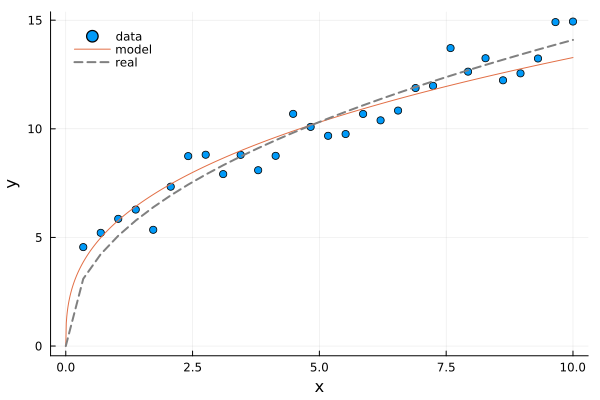

In [15]:
xx = LinRange(0,10,1000)
yy = α*xx.^β

a = 5
b = 0.45
xb = LinRange(0,10,30)
yb = (5*xb.^0.45) # .+ 3*(rand(length(x)) .- 0.5)

scatter(xdata,ydata, label="data", lw=2)
plot!(xx,yy,         label="model")
plot!(xb,yb, linestyle=:dash, color="gray", label="real", lw=2)
plot!(legend_foreground_color=nothing)
plot!(xlabel="x", ylabel="y")